## Comparing signature quality with signature similarity
### For PROGENy benchmark

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import os

In [47]:
#check the random distribution of ROC AUCs
results=pd.read_csv('../results/benchmark/progeny/rocaucs/random_dist.csv',sep=',',header=0,index_col=0)
progeny=pd.read_csv('../results/benchmark/progeny/raw/progeny_meta.csv',
                        sep=',',header=0,index_col=0)
progeny=progeny['pathway'].value_counts()
progeny=progeny[results.index]
background=pd.DataFrame(index=results.index,columns=['Mean','Sd','Size'])
background['Mean']=np.mean(results,1)
background['Sd']=np.std(results,1)
background['Size']=progeny

Text(0, 0.5, 'Pathway size\n(# of experiments per PW)')

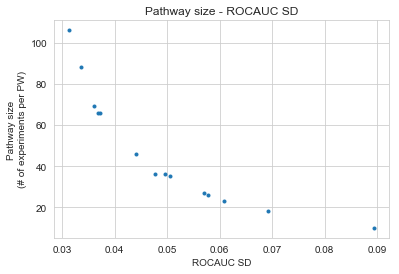

In [48]:
plt.plot(background['Sd'],background['Size'],'.')
plt.title('Pathway size - ROCAUC SD')
plt.xlabel('ROCAUC SD')
plt.ylabel('Pathway size\n(# of experiments per PW)')

In [74]:
#normalise ROCAUCS
fnames=os.listdir('../results/benchmark/progeny/rocaucs/')
fnames.remove('random_dist.csv')
data={}
for fname in fnames:
    data[fname[:-4]]=pd.read_csv('../results/benchmark/progeny/rocaucs/'+fname,sep=',',header=0,index_col=0)
for method in data.keys():
    for pw in background.index:
        data[method].loc[pw,:]=(data[method].loc[pw,:]-0.5)/background.loc[pw,'Sd']
for method in data.keys():
    data[method].to_csv('../results/benchmark/progeny/z_scores/%s.csv' % method, sep=',')

In [213]:
from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr as pcor

def compare_similarity_and_quality(tf,pw,method):
    tf_activity=pd.read_csv('../results/benchmark/progeny/z_scores//%s.csv' % tf, sep=',',header=0,index_col=0).abs().max()
    pw_activity=pd.read_csv('../results/benchmark/progeny/z_scores//%s.csv' % pw, sep=',',header=0,index_col=0).abs().max()
    tf_pw_sim=pd.read_csv('../results/similarity/similarity/%s_%s_%s.csv' % (tf,pw,method),sep=',',
                         header=0,index_col=0)
    tf_sim=np.max(tf_pw_sim,1)[tf_activity.index]
    pw_sim=np.max(tf_pw_sim,0)[pw_activity.index]
    f,axs=plt.subplots(1,2,figsize=(4,2),dpi=300)
    sns.regplot(tf_activity,tf_sim,ax=axs[0],scatter_kws={'s':2})
    sns.regplot(pw_activity,pw_sim,ax=axs[1],scatter_kws={'s':2})
    axs[0].set_ylabel(method + ' with\n' + pw,size=7)
    axs[1].set_ylabel(method + ' with\n' + tf,size=7)
    axs[0].set_xlabel('Gene set quality\n(z score)',size=7)
    axs[1].set_xlabel('Gene set quality\n(z score)',size=7)
    axs[0].set_xticks([5,10])
    axs[0].set_xticklabels([5,10],fontsize=5)
    t=np.max(tf_sim)
    axs[0].set_yticks([t/2,t])
    axs[0].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    axs[1].set_xticks([5,10])
    axs[1].set_xticklabels([5,10],fontsize=5)
    t=np.max(pw_sim)
    axs[1].set_yticks([t/2,t])
    axs[1].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    plt.tight_layout()
    print(tf,scor(tf_activity,tf_sim),pcor(tf_activity,tf_sim))
    print(pw,scor(pw_activity,pw_sim),pcor(pw_activity,pw_sim))

dorothea_AB SpearmanrResult(correlation=0.36511103355548175, pvalue=2.7808525872865843e-06) (0.37118799234444133, 1.8386106322041283e-06)
BIOCARTA SpearmanrResult(correlation=0.31822882616744413, pvalue=1.7037100345656084e-06) (0.37379530472864, 1.3324369412107065e-08)


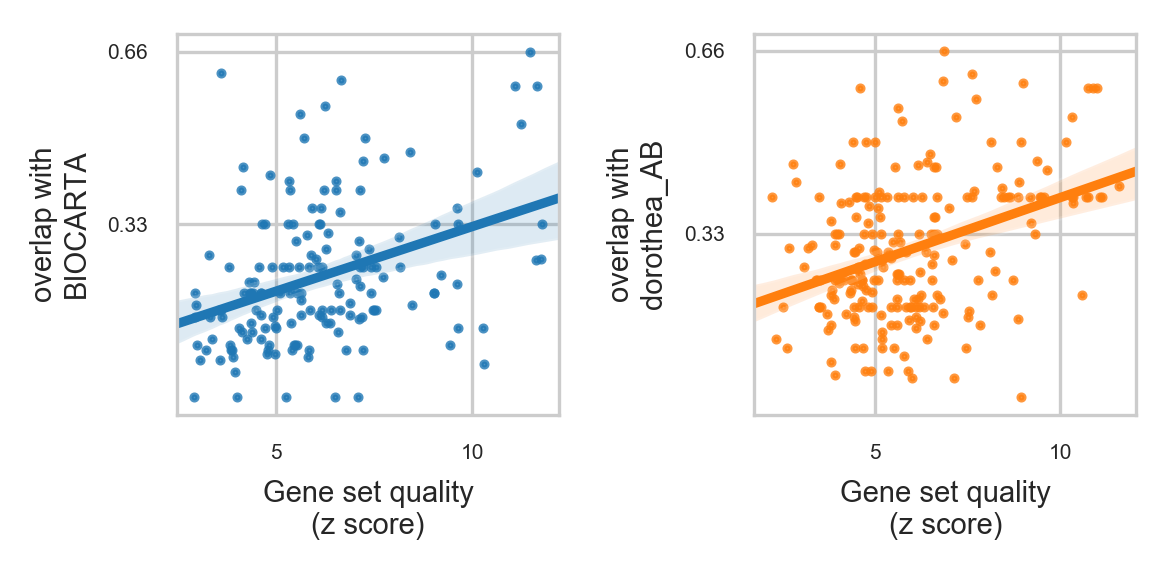

In [234]:
compare_similarity_and_quality('dorothea_AB','BIOCARTA','overlap')

In [260]:
 tf_activity1=pd.read_csv('../results/benchmark/tcga/z_scores//%s.csv' % 'BIOCARTA', sep=',',header=0,index_col=0).abs().max()
 tf_activity2=pd.read_csv('../results/benchmark/progeny//z_scores//%s.csv' % 'BIOCARTA', sep=',',header=0,index_col=0).abs().max()

(0.02499046473305337, 0.714317696743193)

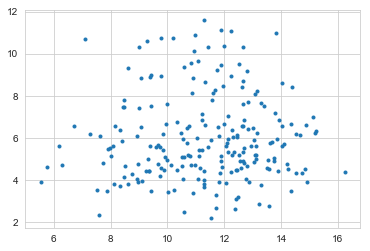

In [261]:
indexes=list(set(tf_activity1.index)&set(tf_activity2.index))
plt.plot(tf_activity1[indexes],tf_activity2[indexes],'.')
pcor(tf_activity1[indexes],tf_activity2[indexes])

In [17]:
#check the random distribution of ROC AUCs
results=pd.read_csv('../results/benchmark/tcga/rocaucs/random_dist.csv',sep=',',header=0,index_col=0)
tcga=pd.read_csv('../results/benchmark/tcga/raw/tcga_meta.csv',
                        sep=',',header=0,index_col=0)
tcga=tcga['TCGA'].value_counts()
tcga=tcga[results.index]
background=pd.DataFrame(index=results.index,columns=['Mean','Sd','Size'])
background['Mean']=np.mean(results,1)
background['Sd']=np.std(results,1)
background['Size']=tcga

Text(0, 0.5, 'Pathway size\n(# of experiments per PW)')

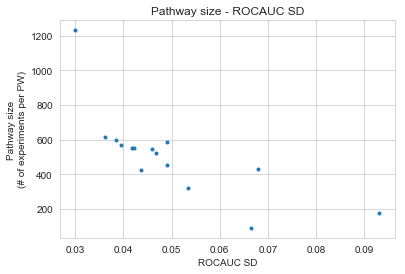

In [18]:
plt.plot(background['Sd'],background['Size'],'.')
plt.title('Pathway size - ROCAUC SD')
plt.xlabel('ROCAUC SD')
plt.ylabel('Pathway size\n(# of experiments per PW)')

In [20]:
#normalise ROCAUCS
fnames=os.listdir('../results/benchmark/tcga//rocaucs/')
fnames.remove('random_dist.csv')
data={}
for fname in fnames:
    data[fname[:-4]]=pd.read_csv('../results/benchmark/tcga/rocaucs/'+fname,sep=',',header=0,index_col=0)
for method in data.keys():
    for pw in background.index:
        data[method].loc[pw,:]=(data[method].loc[pw,:]-0.5)/background.loc[pw,'Sd']
for method in data.keys():
    data[method].to_csv('../results/benchmark/tcga/z_scores/%s.csv' % method, sep=',')

In [169]:
from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr as pcor

def compare_similarity_and_quality(tf,pw,method):
    tf_activity=pd.read_csv('../results/benchmark/tcga/z_scores//%s.csv' % tf, sep=',',header=0,index_col=0).abs().max()
    pw_activity=pd.read_csv('../results/benchmark/tcga/z_scores//%s.csv' % pw, sep=',',header=0,index_col=0).abs().max()
    tf_pw_sim=pd.read_csv('../results/similarity/similarity/%s_%s_%s.csv' % (tf,pw,method),sep=',',
                         header=0,index_col=0)
    tf_sim=np.max(tf_pw_sim,1)[tf_activity.index]
    pw_sim=np.max(tf_pw_sim,0)[pw_activity.index]
    f,axs=plt.subplots(1,2,figsize=(4,2),dpi=300)
    sns.regplot(tf_activity,tf_sim,ax=axs[0],scatter_kws={'s':2})
    sns.regplot(pw_activity,pw_sim,ax=axs[1],scatter_kws={'s':2})
    axs[0].set_ylabel(method + ' with\n' + pw,size=7)
    axs[1].set_ylabel(method + ' with\n' + tf,size=7)
    axs[0].set_xlabel('Gene set quality\n(z score)',size=7)
    axs[1].set_xlabel('Gene set quality\n(z score)',size=7)
    #axs[0].set_xticks([5,10])
    #axs[0].set_xticklabels([5,10],fontsize=5)
    t=np.max(tf_sim)
    axs[0].set_yticks([t/2,t])
    axs[0].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    #axs[1].set_xticks([5,10])
    #axs[1].set_xticklabels([5,10],fontsize=5)
    t=np.max(pw_sim)
    axs[1].set_yticks([t/2,t])
    axs[1].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    plt.tight_layout()
    print(tf,scor(tf_activity,tf_sim),pcor(tf_activity,tf_sim))
    print(pw,scor(pw_activity,pw_sim),pcor(pw_activity,pw_sim))   

dorothea_AB SpearmanrResult(correlation=0.11481473178495936, pvalue=0.12807806865464755) (0.09064900640083684, 0.23016500684957927)
BIOCARTA SpearmanrResult(correlation=0.17727063791678047, pvalue=0.008869676019746087) (0.17313250887737353, 0.010618938971310044)


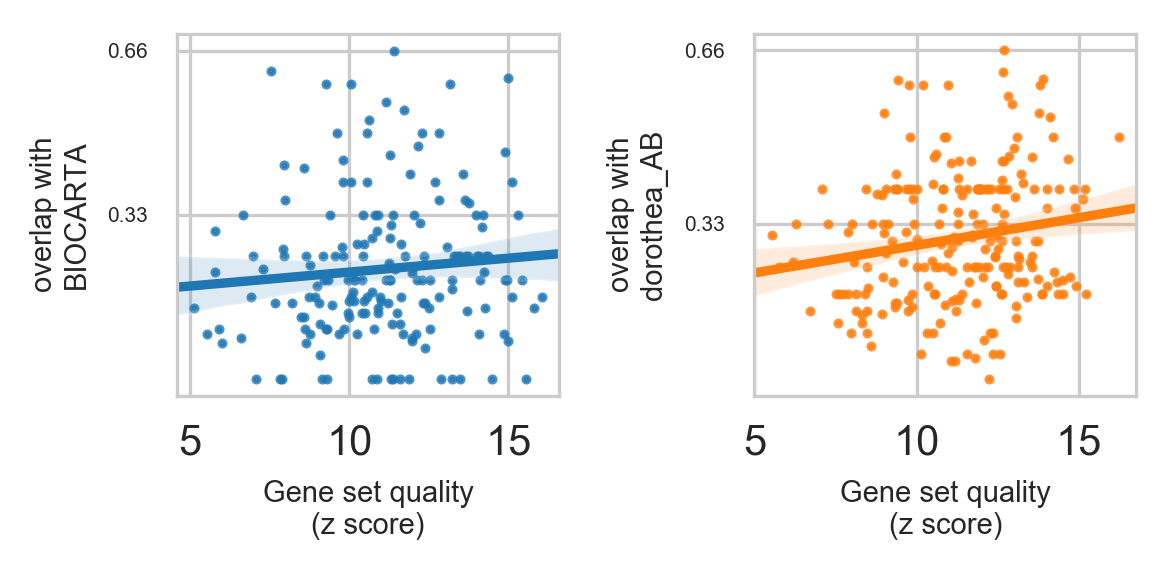

In [198]:
compare_similarity_and_quality('dorothea_AB','BIOCARTA','overlap')

In [168]:
from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr as pcor

def compare_similarity_and_quality(tf,pw,method):
    tf_activity=pd.read_csv('../results/benchmark/gdsc/partcors//%s.csv' % tf, sep=',',header=0,index_col=0)
    tf_activity=((tf_activity.T-np.mean(tf_activity,1))/np.std(tf_activity,1)).T.abs().max()
    pw_activity=pd.read_csv('../results/benchmark/gdsc/partcors//%s.csv' % pw, sep=',',header=0,index_col=0)
    pw_activity=((pw_activity.T-np.mean(pw_activity,1))/np.std(pw_activity,1)).T.abs().max()
    tf_pw_sim=pd.read_csv('../results/similarity/similarity/%s_%s_%s.csv' % (tf,pw,method),sep=',',
                         header=0,index_col=0)
    tf_sim=np.max(tf_pw_sim,1)[tf_activity.index]
    pw_sim=np.max(tf_pw_sim,0)[pw_activity.index]
    f,axs=plt.subplots(1,2,figsize=(4,2),dpi=300)
    sns.regplot(tf_activity,tf_sim,ax=axs[0],scatter_kws={'s':2})
    sns.regplot(pw_activity,pw_sim,ax=axs[1],scatter_kws={'s':2})
    #axs[0].set_ylabel(method + ' with\n' + pw,size=7)
    #axs[1].set_ylabel(method + ' with\n' + tf,size=7)
    #axs[0].set_xlabel('Gene set quality\n(z score)',size=7)
    #axs[1].set_xlabel('Gene set quality\n(z score)',size=7)
    #axs[0].set_xticks([5,10])
    #axs[0].set_xticklabels([5,10],fontsize=5)
    #t=np.max(tf_sim)
    #axs[0].set_yticks([t/2,t])
    #axs[0].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    #axs[1].set_xticks([5,10])
    #axs[1].set_xticklabels([5,10],fontsize=5)
    #t=np.max(pw_sim)
    #axs[1].set_yticks([t/2,t])
    #axs[1].set_yticklabels([str(t/2)[:4],str(t)[:4]],fontsize=5)
    plt.tight_layout()
    print(tf,scor(tf_activity,tf_sim),pcor(tf_activity,tf_sim))
    print(pw,scor(pw_activity,pw_sim),pcor(pw_activity,pw_sim))   

dorothea_A SpearmanrResult(correlation=0.07753351829901167, pvalue=0.32980422649319574) (-0.039517068287342395, 0.6198024118624732)
KEGG SpearmanrResult(correlation=-0.33769293694249797, pvalue=2.432812142933918e-06) (-0.3145367430773439, 1.2295578284892521e-05)


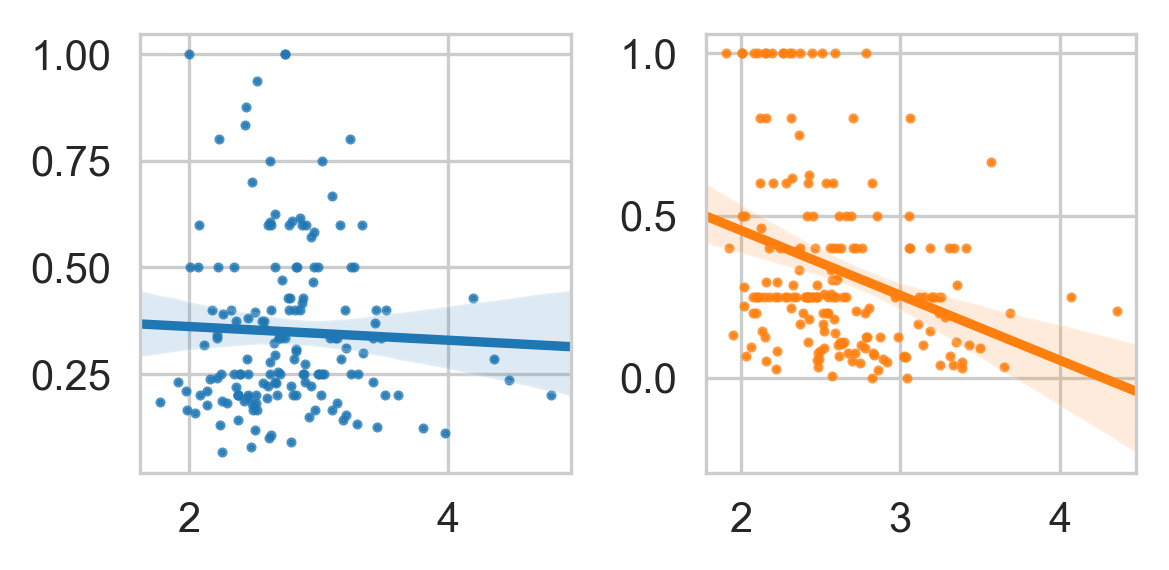

In [101]:
compare_similarity_and_quality('dorothea_A','KEGG','overlap')

In [164]:
temp=pd.read_csv('../results/benchmark/progeny/z_scores/KEGG.csv',sep=',',header=0,index_col=0)
np.mean(np.max(temp))

5.541114373556507

In [152]:
np.mean(np.max(temp))

6.4224308824521605